In [6]:
!nvcc softmax.cpp softmax_kernel.cu -O3 --use_fast_math \
    -I/media/avaish/linux-games/cuda-samples/Common -o softmax_bench

softmax.cpp: In function ‘float benchmarkSoftmax(int, int, int, int, float*, float*, float*, float*)’:
softmax.cpp:68:5: error: ‘normalize_kernel’ was not declared in this scope
   68 |     normalize_kernel<<<blocks, threads>>>(d_output, sum_total, N);
      |     ^~~~~~~~~~~~~~~~
softmax.cpp:68:23: error: expected primary-expression before ‘<’ token
   68 |     normalize_kernel<<<blocks, threads>>>(d_output, sum_total, N);
      |                       ^
softmax.cpp:68:41: error: expected primary-expression before ‘>’ token
   68 |     normalize_kernel<<<blocks, threads>>>(d_output, sum_total, N);
      |                                         ^


In [7]:
!./softmax_bench > softmax_shmoo.csv

CUDA error at softmax.cu:59 code=1(cudaErrorInvalidValue) "cudaMemcpy(h_partial, d_partial, blocks * sizeof(float), cudaMemcpyDeviceToHost)" 


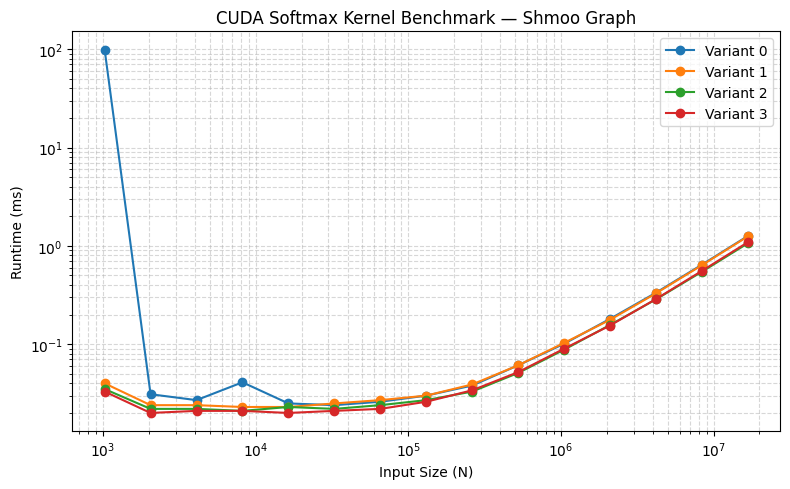

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Automatically skip non-CSV lines
df = pd.read_csv("shmoo_16m.csv", comment='=', engine='python')

# Drop any rows that don't have numeric Variant IDs
df = df[pd.to_numeric(df["Variant"], errors="coerce").notna()]
df["Variant"] = df["Variant"].astype(int)

# Extract sizes from header
sizes = [int(float(c)) for c in df.columns[1:]]

plt.figure(figsize=(8,5))

for _, row in df.iterrows():
    plt.plot(sizes, row.iloc[1:].astype(float),
             marker='o', label=f"Variant {int(row['Variant'])}")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Input Size (N)")
plt.ylabel("Runtime (ms)")
plt.title("CUDA Softmax Kernel Benchmark — Shmoo Graph")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
